In [1]:
import numpy as np # 
import pandas as pd
import trackpy as tp
from trackpy import static as stat
from matplotlib import pylab as plt

from scipy.ndimage.filters import gaussian_filter

cmap = plt.cm.cool # color map


In [2]:
savepath_MSD = "/data2/Ong/Tracking result/17_06_06 Dense exp 3/dense 5 fps/graph+etc/MSD_Act{}.cvs"

# the Deble-Waller factor

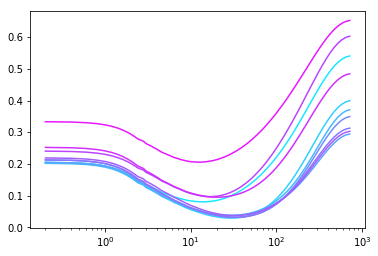

In [7]:
maxact = 11
plt.figure()
plt.clf()
for act in range(1,11):
   em = pd.read_csv(savepath_MSD.format(act)) # load MSD files
   
   delta = np.diff(np.log(em.msd))/np.diff(np.log(em.lagt))
   plt.plot(em.lagt[:-1],gaussian_filter(delta,7), '-', color=cmap((act)/maxact), mec=cmap((act)/maxact), markersize=5)#.format(act)) # de
plt.xscale('log')
plt.show()

In [74]:
DW = np.zeros((maxact,1))
t_DW = np.zeros((maxact,1))
for act in range(1,maxact+1):
    em = pd.read_csv(savepath_MSD.format(act)) # load MSD files
    
    delta = np.diff(np.log(em.msd))/np.diff(np.log(em.lagt))
    index = np.where(gaussian_filter(delta,7) == min(gaussian_filter(delta,7)))
    t_DW[act-1] = em.lagt[index[0][0]]
    DW[act-1] = em.msd[index[0][0]]

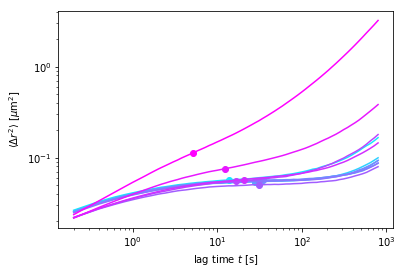

In [76]:
plt.figure()
for act in range(1,maxact+1):
    em = pd.read_csv(savepath_MSD.format(act)) # load MSD files
    plt.plot(em['lagt'], em['msd'], '-', color=cmap((act)/maxact), mec=cmap((act)/maxact), markersize=5)#.format(act)) # detail = True
    plt.plot(t_DW[act-1], DW[act-1],'o',color=cmap((act)/maxact))
    
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$ [s]')
plt.show()
    

In [59]:
DW

array([[ 0.05683607],
       [ 0.05430728],
       [ 0.05288873],
       [ 0.05401094],
       [ 0.05504262],
       [ 0.05380924],
       [ 0.04901702],
       [ 0.0540763 ],
       [ 0.05542863],
       [ 0.07693908],
       [ 0.1701389 ]])

# the fluctuation of position

In [128]:
savepath_traj_f = "/data2/Ong/Tracking result/17_03_29 Dense exp/Dense fps 5/Traj_f_Act{}.h5"  # final trajectory
act = 1
traj = tp.PandasHDFStoreSingleNode(savepath_traj_f.format(act))
mpp = 0.171

In [129]:
x = traj.store.select(traj.key,'particle == 4852',columns='x')*mpp
y = traj.store.select(traj.key,'particle == 4852',columns='y')*mpp

In [106]:
len(x)

3888

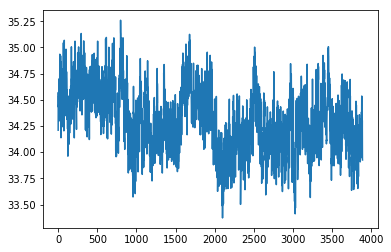

In [130]:
plt.plot(x.values)
plt.show()

In [159]:
tb = 3
tmin = tb
tmax = len(x)-tb
S2 = np.zeros((tmax-tmin,1))
for i,t in enumerate(range(tmin,tmax)):
    xav = np.average(x.iloc[t-tb:t+tb])
    yav = np.average(y.iloc[t-tb:t+tb])
    
    xtb = x.iloc[t-tb:t+tb]
    ytb = y.iloc[t-tb:t+tb]
    
    delta2_x = (xtb - xav*np.ones((len(xtb),1)))**2
    delta2_y = (ytb - yav*np.ones((len(ytb),1)))**2
    
    S2_x = np.average(delta2_x)
    S2_y = np.average(delta2_y)
    S2[i] = S2_x + S2_y

In [160]:
np.count_nonzero(np.where(S2>=DW[0]))

292

In [162]:
np.sqrt(0.056)

0.23664319132398465

In [118]:
delta_x = (xtb - xav*np.ones((len(xtb),1)))**2

In [119]:
delta_x

,x
4852,3.031634
4529,0.000234
4527,0.137667
4486,0.128966
4455,0.205527
4442,0.111621
4429,0.137022
4451,0.028490
4415,0.018825
4402,1.253522
